# Analysing Seattle Data Set

The following EDA uses the Airbnb Data Set that can be found here: https://www.kaggle.com/airbnb/seattle 
Thre questions are investigated within this notebook, namely:

- how much one can expect to pay for an Airbnb accomondation in Seattle and what might affect the price
- how the availability of accomondations differ depending the time dimension
- how much revenue one can expect by providing an accomondation in Seattle on Airbnb
    

In [191]:
import numpy as np 
import pandas as pd 
import re
import os
import tabulate

pd.set_option('display.max_columns', None)

## Section 2: Data Understanding

In [73]:
df_rev = pd.read_csv('reviews.csv')
df_cal = pd.read_csv('calendar.csv')
df_list = pd.read_csv('listings.csv')

In [63]:
df_rev.head(10)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...
5,7202016,43979139,2015-08-23,1154501,Barent,"Kelly was great, place was great, just what I ..."
6,7202016,45265631,2015-09-01,37853266,Kevin,Kelly was great! Very nice and the neighborhoo...
7,7202016,46749120,2015-09-13,24445447,Rick,hola all bnb erz - Just left Seattle where I h...
8,7202016,47783346,2015-09-21,249583,Todd,Kelly's place is conveniently located on a qui...
9,7202016,48388999,2015-09-26,38110731,Tatiana,"The place was really nice, clean, and the most..."


In [64]:
df_cal.head(10)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
5,241032,2016-01-09,f,NaN
6,241032,2016-01-10,f,NaN
7,241032,2016-01-11,f,NaN
8,241032,2016-01-12,f,NaN
9,241032,2016-01-13,t,$85.00


In [5]:
df_list.head(10)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

## Section 3: Data Preperation and Data cleaning

#### Generate a price format adjustment function

In [80]:
def price_column_to_int(column):
    column = column.apply(str)
    column = column.apply(lambda col_value: re.sub("[\$,]", '', col_value))
    return(column.astype(float))
    
    #return re.sub("[\$,]", '', column).astype(float)

#### Changing price format

In [81]:
df_cal["price"] = price_column_to_int(df_cal["price"])
df_list["price"] = price_column_to_int(df_list["price"])
df_list["weekly_price"] = price_column_to_int(df_list["weekly_price"])
df_list["monthly_price"] = price_column_to_int(df_list["monthly_price"])
df_list["security_deposit"] = price_column_to_int(df_list["security_deposit"])
df_list["cleaning_fee"] = price_column_to_int(df_list["cleaning_fee"])

#### Transform as date format

In [82]:
df_cal['date'] = pd.to_datetime(df_cal['date'])

#### Transform nominal variables

In [83]:
inst_book_values = {"f": 0, "t": 1}
df_list["instant_bookable"] = df_list.instant_bookable.map(inst_book_values)

In [84]:
df_list['host_response_time_encoded'] = df_list['host_response_time'].map({"within an hour": 0, 
                                                                           "within a few hours": 1,
                                                                           "within a day": 2,
                                                                           "a few days or more":3
                                                                          }) 

In [85]:
df_list["host_is_superhost"] = df_list["host_is_superhost"].map({"f": 0, "t": 1})

#### Remove NaNs from host_total_listings_count

In [86]:
df_list = df_list.dropna(subset = ["host_total_listings_count"], how ='any')

In [87]:
df_list.loc[df_list["host_total_listings_count"].isnull(), ]

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_response_time_encoded


#### Change host_total_listings_count as int

In [90]:
df_list["host_total_listings_count"] = df_list["host_total_listings_count"].astype(int)

In [91]:
df_cal["price"].isnull().sum()

459028

#### Checking how much missing values are present in relevant variables

In [92]:
(df_cal["price"].isnull().sum(),df_list["weekly_price"].isnull().sum(), df_list["monthly_price"].isnull().sum(), df_list["security_deposit"].isnull().sum(), df_list["cleaning_fee"].isnull().sum())

(459028, 1809, 2300, 1950, 1029)

#### Getting info for variables

In [94]:
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  int64         
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       934542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 42.5+ MB


In [254]:
df_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3817
Data columns (total 93 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3815 non-null   int64  
 1   listing_url                       3815 non-null   object 
 2   scrape_id                         3815 non-null   int64  
 3   last_scraped                      3815 non-null   object 
 4   name                              3815 non-null   object 
 5   summary                           3638 non-null   object 
 6   space                             3248 non-null   object 
 7   description                       3815 non-null   object 
 8   experiences_offered               3815 non-null   object 
 9   neighborhood_overview             2785 non-null   object 
 10  notes                             2211 non-null   object 
 11  transit                           2883 non-null   object 
 12  thumbn

#### Remove Outlier

In [95]:
df_list.drop(int(df_list.loc[df_list["minimum_nights"] == 1000].index[0]), inplace = True)

#### Define Variables which will be used for correlations

In [2]:
relevant_var = [
                'instant_bookable'
                ,'review_scores_value' 
                ,'review_scores_rating'
                ,'bathrooms'
                ,'bedrooms'
                ,'beds'
                ,'cleaning_fee'
                ,'extra_people'
                ,'minimum_nights'
                ,'reviews_per_month'
                ,'availability_30'
                ,'availability_60'
                ,'availability_90'
                ,'availability_365'
                ,'security_deposit'
                ,'host_listings_count'
                ,'host_total_listings_count'
                ,'weekly_price'
                ,'monthly_price'
                ,'price'
]

## EDA & Evaluate the Results

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

### Question 1: How much can one expect to pay for staying in an Airbnb accommodation in Seattle?

In [204]:
df_list["price"].describe()

count    3815.000000
mean      127.946003
std        90.261958
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

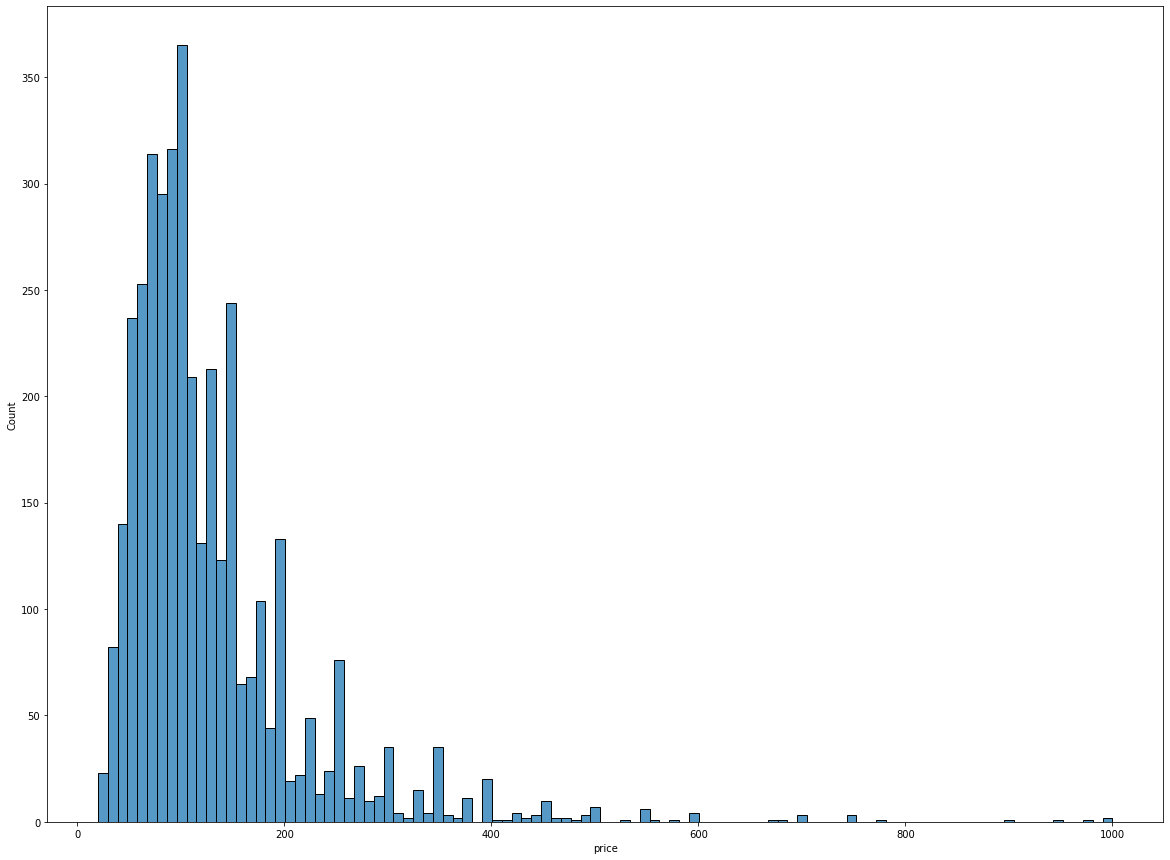

In [205]:
sns.histplot(x='price', data=df_list[relevant_var])

Description plot: Shows a histogram of the price distribution. Most object that are offered in Seattle are below 200$

In [139]:
df_list.groupby(['property_type', 'room_type']).price.mean().unstack()

room_type,Entire home/apt,Private room,Shared room
property_type,,,
Apartment,132.456140,78.593886,53.372549
Bed & Breakfast,96.333333,115.969697,30.000000
Boat,447.250000,117.500000,NaN
Bungalow,119.416667,70.000000,NaN
Cabin,114.125000,74.400000,NaN
Camper/RV,137.888889,75.000000,100.000000
Chalet,135.000000,62.000000,NaN
Condominium,167.902778,88.166667,75.000000
Dorm,NaN,NaN,39.500000


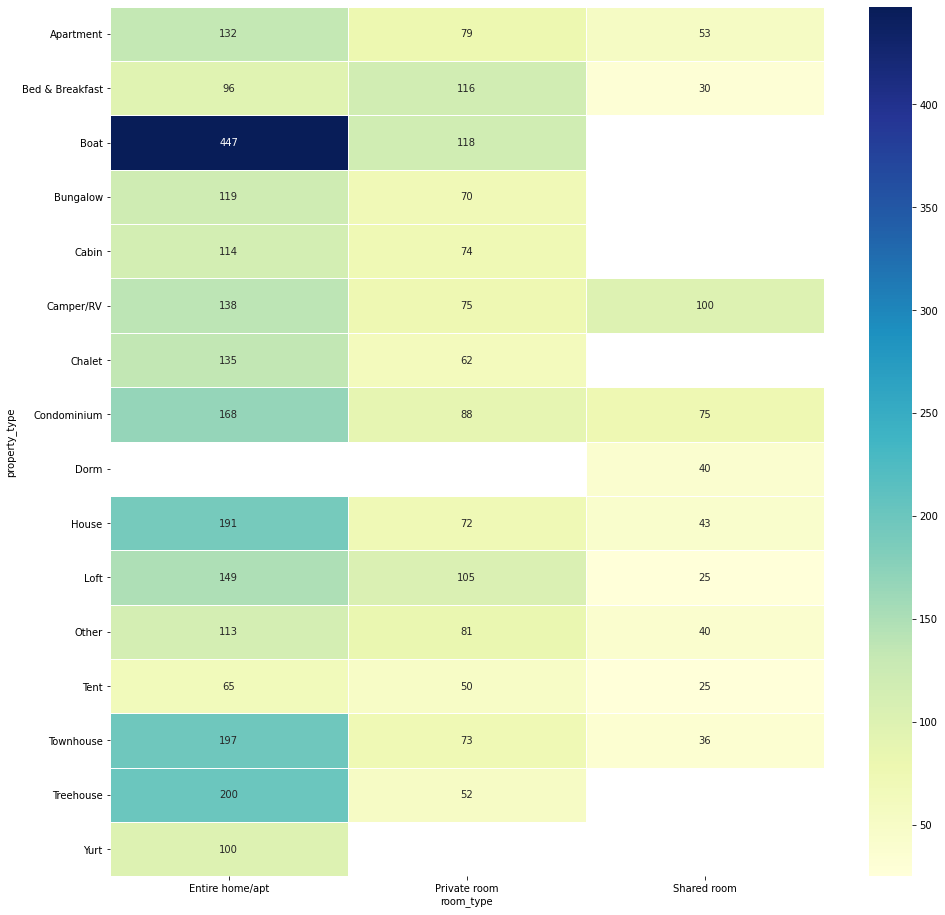

In [157]:
plt.figure(figsize=(16,16))
ax = sns.heatmap(df_list.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap="YlGnBu",  linewidths=.5)


Description Heatmap: Shows the price differences depending on the accommodation type and if the whole accommodation is rented or
only a room or a shared room is rented. As expected houses and apartments are the more expensive. But the most expensive is renting a boat.

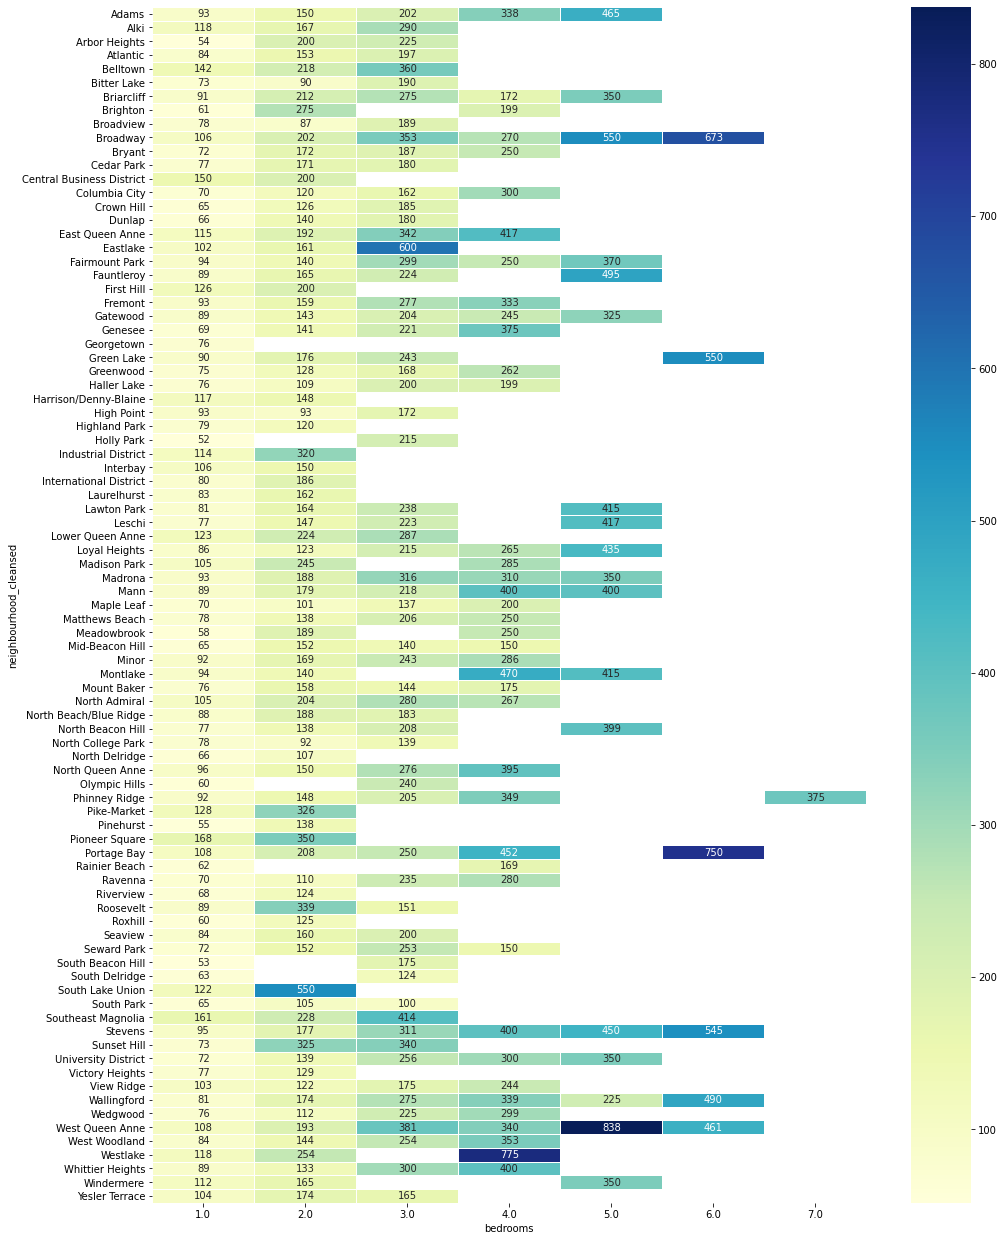

In [185]:
plt.figure(figsize=(16,22))
ax = sns.heatmap(df_list.loc[~(df_list["bedrooms"] == 0), :].groupby(['neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(), annot=True, fmt=".0f", cmap="YlGnBu",  linewidths=.5)


Description Heatmap 2: This heatmap shows the price differences depending on the neighboorhood of the accommodation. It shows clearly
the price differences between the top places like the Pioneer Square and more affordable places like Pinehust. It is also grouped by the number
of bedrooms that are offered.

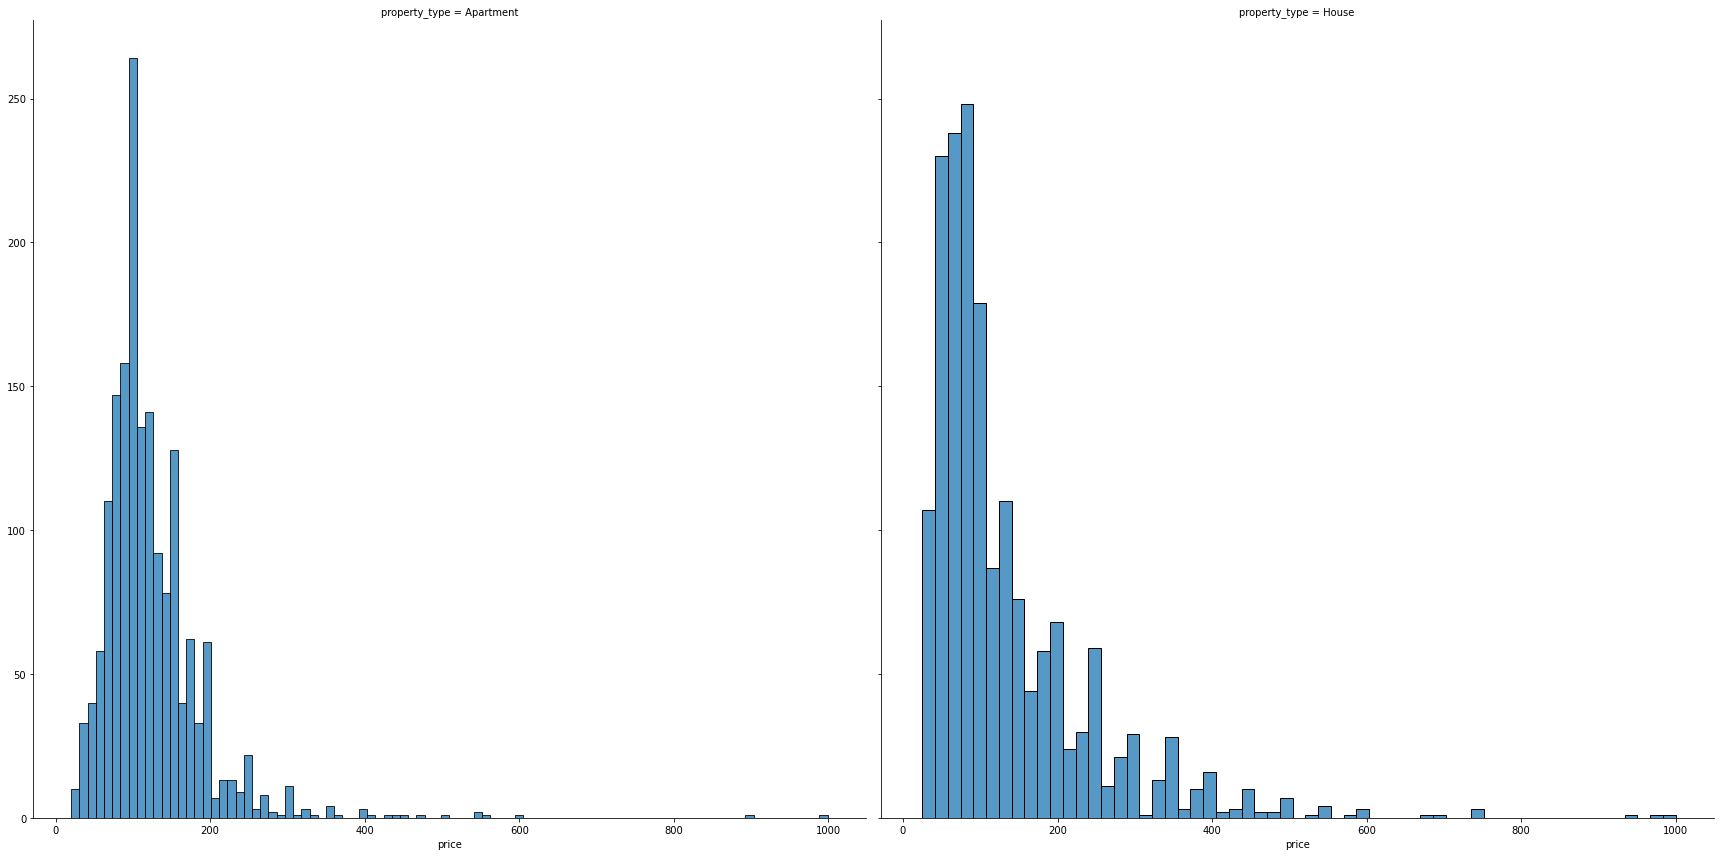

In [149]:
g = sns.FacetGrid(df_list.loc[df_list["property_type"].isin(["Apartment", "House"]), :], col="property_type", height=12)
g.map(sns.histplot, "price")

Description plot 2: These side by side plots show to histograms of the price of all apartments and houses side by side. The price
distribution do not differ much by their form but there is a high difference between the upper limit.

In [131]:
df_cal_2016[['date','price']].groupby([df_cal.date.dt.year, df_cal.date.dt.month, df_cal.available ]).agg({'price': ['mean', 'std']})

price            
                           mean         std
date date available                        
2016 1    f                 NaN         NaN
          t          121.568409   86.900024
     2    f                 NaN         NaN
          t          124.293927   91.550076
     3    f                 NaN         NaN
          t          128.644488   94.371410
     4    f                 NaN         NaN
          t          135.097005   98.232098
     5    f                 NaN         NaN
          t          139.538183  102.863280
     6    f                 NaN         NaN
          t          147.473137  112.481803
     7    f                 NaN         NaN
          t          152.094150  120.078098
     8    f                 NaN         NaN
          t          150.656594  118.754189
     9    f                 NaN         NaN
          t          143.255949  108.804290
     10   f                 NaN         NaN
          t          137.031939  104.491505
     11   f                 NaN         NaN
          t          135.688738  104.264654
     12   f                 NaN         NaN
          t          137.251835  105.101659

The above table shows how much on average one can expect to pay for accomondations grouped by month and how high the standard deviation is for these months for the price.

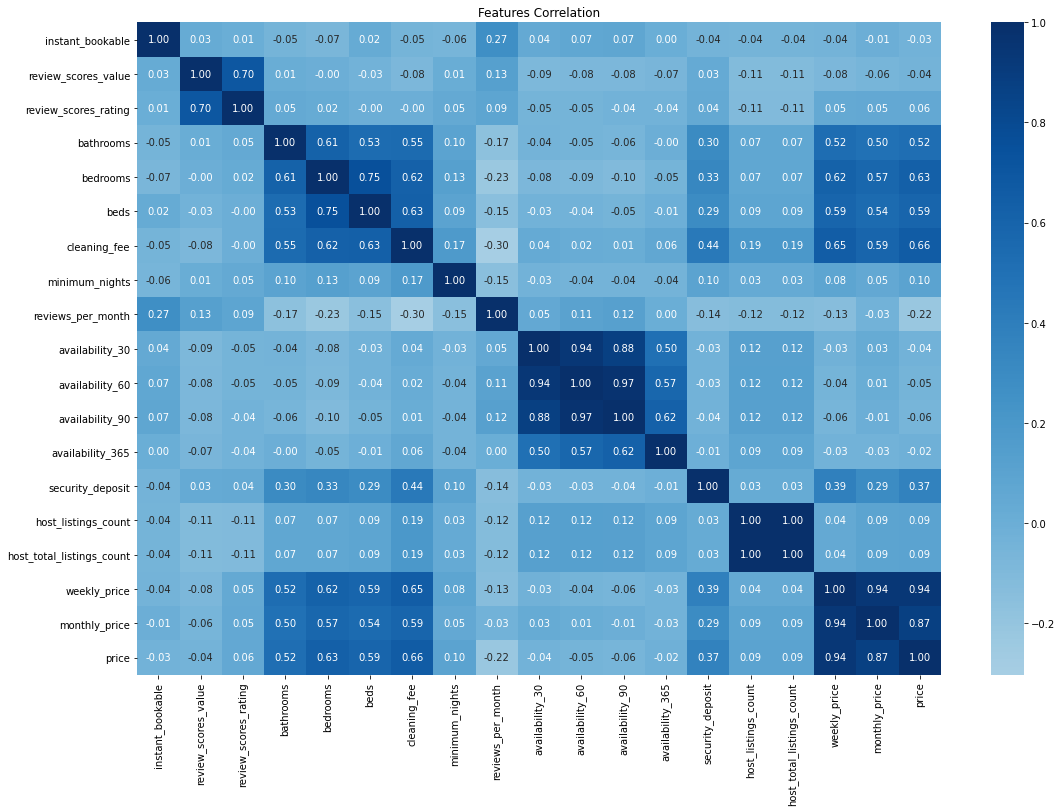

In [134]:
corr = df_list[relevant_var].corr()
kot = corr[corr.apply(lambda x: abs(x)>=0)]
sns.heatmap(kot, annot = True, fmt = '.2f', cmap = 'Blues', center = 0)
plt.rcParams["figure.figsize"] = (20,15)
plt.title('Features Correlation');
plt.xticks(rotation = 90);

The above correlation plot shows the strongest correlations with the price. Without a suprise factors like the size of the accommodation which can be 
taken by the amount of bedrooms or the number of beds correlate stronger with the price.

In [135]:
df_list[['host_response_time_encoded', 'price']].corr()

,host_response_time_encoded,price
host_response_time_encoded,1.000000,0.082672
price,0.082672,1.000000


### Question 2: When is the best time to get Airbnb accommodation

In [23]:
df_cal.groupby(df_cal['date'].map(lambda x: x.year)).size()

date
2016    1385934
2017       7636
dtype: int64

In [94]:
df_cal['date'].groupby([df_cal.date.dt.year, df_cal.date.dt.month]).agg('count')

date  date
2016  1       106904
      2       110722
      3       118358
      4       114540
      5       118358
      6       114540
      7       118358
      8       118358
      9       114540
      10      118358
      11      114540
      12      118358
2017  1         7636
Name: date, dtype: int64

It does not make sense to compare the data of 2017 to 2016 because only one month is present in 2016

In [24]:
df_cal_2016 = df_cal[df_cal.date.dt.year == 2016]
month = df_cal.date.dt.month

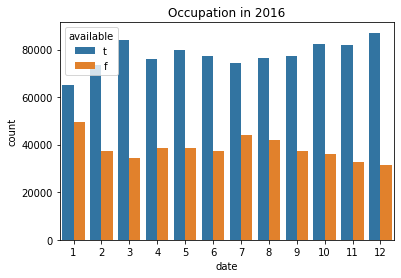

In [25]:
sns.countplot(data = df_cal, x = month, hue = 'available');
plt.title('Occupation in 2016');

Description Time Series Plot: This plot shows the total number of available and taken nights for all offered accommodations for the year 2016. 
From this plot it is clear that for example the month December has more nights available to book then July or August, which can be considered as high demand months.

In [26]:
df_cal_2016['date'].groupby([df_cal.date.dt.year, df_cal.date.dt.month, df_cal.available ]).agg('count')

date  date  available
2016  1     f            47665
            t            59239
      2     f            37401
            t            73321
      3     f            34420
            t            83938
      4     f            38503
            t            76037
      5     f            38387
            t            79971
      6     f            37296
            t            77244
      7     f            44136
            t            74222
      8     f            42011
            t            76347
      9     f            37294
            t            77246
      10    f            35920
            t            82438
      11    f            32760
            t            81780
      12    f            31297
            t            87061
Name: date, dtype: int64

In [27]:
year_group_available = df_cal_2016['date'].groupby([df_cal.date.dt.year, df_cal.date.dt.month, df_cal.available ]).agg('count')


In [28]:
group_pcts = year_group_available.groupby(level=1).apply(lambda x: 100 * x / float(x.sum()))
group_pcts

date  date  available
2016  1     f            44.586732
            t            55.413268
      2     f            33.779195
            t            66.220805
      3     f            29.081262
            t            70.918738
      4     f            33.615331
            t            66.384669
      5     f            32.432958
            t            67.567042
      6     f            32.561551
            t            67.438449
      7     f            37.290255
            t            62.709745
      8     f            35.494855
            t            64.505145
      9     f            32.559804
            t            67.440196
      10    f            30.348603
            t            69.651397
      11    f            28.601362
            t            71.398638
      12    f            26.442657
            t            73.557343
Name: date, dtype: float64

In [3]:
fig, axs = plt.subplots(ncols=2)
sns.histplot(x='host_listings_count', data=df_list[relevant_var], ax=axs[0])
sns.histplot(x='availability_365', data=df_list[relevant_var], ax=axs[1])

NameError: name 'plt' is not defined

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

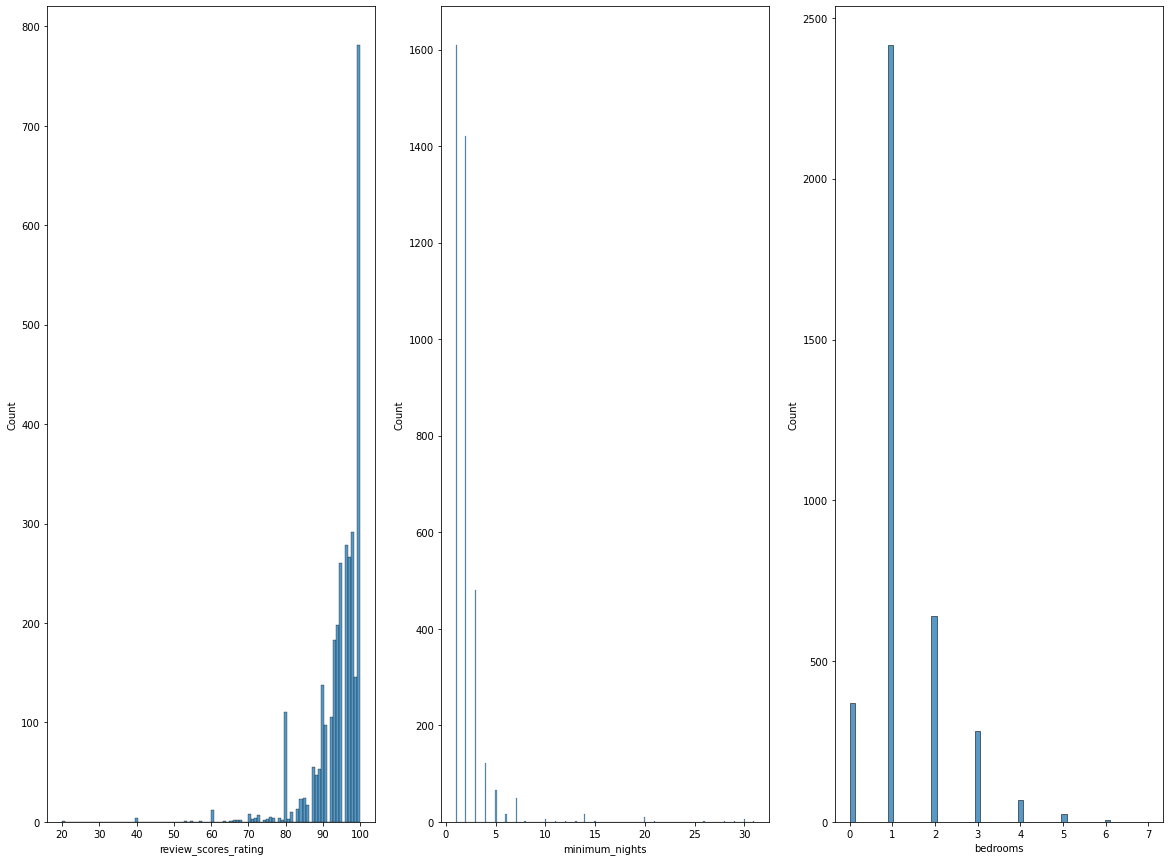

In [57]:
fig, axs = plt.subplots(ncols=3)
sns.histplot(x='review_scores_rating', data=df_list[relevant_var], ax=axs[0])
sns.histplot(x='minimum_nights', data=df_list[relevant_var], ax=axs[1])
sns.histplot(x='bedrooms', data=df_list[relevant_var], ax=axs[2])

In [58]:
df_list['minimum_nights'].describe()

count    3815.000000
mean        2.108257
std         2.252092
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        31.000000
Name: minimum_nights, dtype: float64

In [183]:
df_list['host_response_time'].value_counts()

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

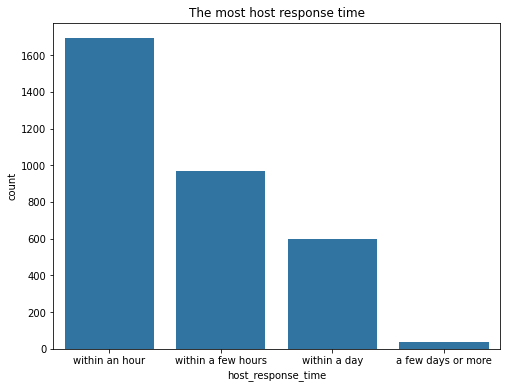

In [193]:
cat_order = df_list['host_response_time'].value_counts().index

sns.countplot(data = df_list, x = 'host_response_time',  order=cat_order, color=sns.color_palette()[0])
plt.rcParams["figure.figsize"] = (8,6)
plt.title('The most host response time', );

#### No one is not accepting anybody except one guy

In [200]:
df_list.host_acceptance_rate.value_counts()

100%    3044
0%         1
Name: host_acceptance_rate, dtype: int64

In [201]:
df_list.host_is_superhost.value_counts()

f    3038
t     778
Name: host_is_superhost, dtype: int64

In [203]:
df_list[['host_is_superhost', 'price']].corr()

,host_is_superhost,price
host_is_superhost,1.000000,0.012272
price,0.012272,1.000000


In [257]:
df_list["host_total_listings_count"].describe()

count    3816.000000
mean        7.157757
std        28.628149
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       502.000000
Name: host_total_listings_count, dtype: float64

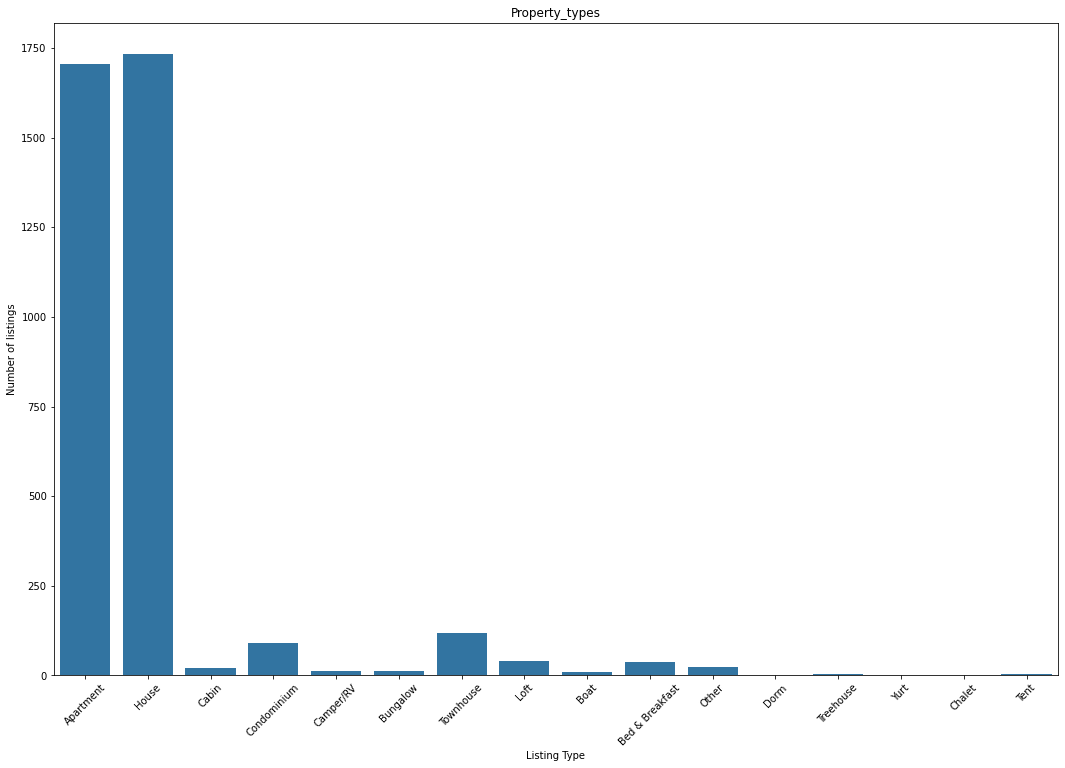

In [125]:
df_list['property_type'].value_counts().index

sns.countplot(data = df_list, x = 'property_type',  color=sns.color_palette()[0])
plt.rcParams["figure.figsize"] = (18,12)
plt.ylabel('Number of listings')
plt.xlabel('Listing Type')
plt.xticks(rotation = 45)
plt.title('Property_types', );

### Question 3: How much Revenue one can expect when offering a accommodation on Airbnb living in Seattle?

In [96]:
df_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [101]:
df_cal.groupby(["listing_id"]).agg({"price": 'mean'})

,price
listing_id,
3335,120.000000
4291,82.000000
5682,53.944984
6606,92.849315
7369,85.000000
...,...
10332096,40.000000
10334184,120.000000
10339144,NaN


In [244]:
list_taken = df_cal.groupby(["listing_id", "available"]).size()#.unstack()
list_taken

listing_id  available
3335        f             56
            t            309
4291        t            365
5682        f             56
            t            309
                        ... 
10334184    t            361
10339144    f            365
10339145    t            365
10340165    f              7
            t            358
Length: 6863, dtype: int64

In [245]:
list_taken = list_taken.reset_index()

In [246]:
list_taken.loc[list_taken["available"] == 'f']

,listing_id,available,0
0,3335,f,56
3,5682,f,56
6,7369,f,312
9,9460,f,308
11,9531,f,185
...,...,...,...
6852,10319529,f,364
6854,10331249,f,11
6857,10334184,f,4
6859,10339144,f,365


In [247]:
df_list[["id", "price"]]

,id,price
0,241032,85.0
1,953595,150.0
2,3308979,975.0
3,7421966,100.0
4,278830,450.0
...,...,...
3813,8101950,359.0
3814,8902327,79.0
3815,10267360,93.0
3816,9604740,99.0


In [248]:
taken_listings_price = pd.merge(list_taken.loc[list_taken["available"] == 'f'], df_list[["id", "price"]], how = "inner", left_on = "listing_id", right_on = "id" )
taken_listings_price

,listing_id,available,0,id,price
0,3335,f,56,3335,120.0
1,5682,f,56,5682,48.0
2,7369,f,312,7369,85.0
3,9460,f,308,9460,99.0
4,9531,f,185,9531,165.0
...,...,...,...,...,...
3132,10319529,f,364,10319529,49.0
3133,10331249,f,11,10331249,45.0
3134,10334184,f,4,10334184,120.0
3135,10339144,f,365,10339144,60.0


In [250]:
taken_listings_price["revenue_listings"] = taken_listings_price[0] * taken_listings_price["price"]
taken_listings_price["revenue_listings"]

0        6720.0
1        2688.0
2       26520.0
3       30492.0
4       30525.0
         ...   
3132    17836.0
3133      495.0
3134      480.0
3135    21900.0
3136      301.0
Name: revenue_listings, Length: 3137, dtype: float64

In [251]:
taken_listings_price

,listing_id,available,0,id,price,revenue_listings
0,3335,f,56,3335,120.0,6720.0
1,5682,f,56,5682,48.0,2688.0
2,7369,f,312,7369,85.0,26520.0
3,9460,f,308,9460,99.0,30492.0
4,9531,f,185,9531,165.0,30525.0
...,...,...,...,...,...,...
3132,10319529,f,364,10319529,49.0,17836.0
3133,10331249,f,11,10331249,45.0,495.0
3134,10334184,f,4,10334184,120.0,480.0
3135,10339144,f,365,10339144,60.0,21900.0


In [253]:
taken_listings_price["revenue_listings"].describe()

count      3137.000000
mean      18905.196685
std       23613.991762
min          39.000000
25%        2175.000000
50%       11872.000000
75%       27225.000000
max      364635.000000
Name: revenue_listings, dtype: float64

<AxesSubplot:xlabel='revenue_listings', ylabel='Count'>

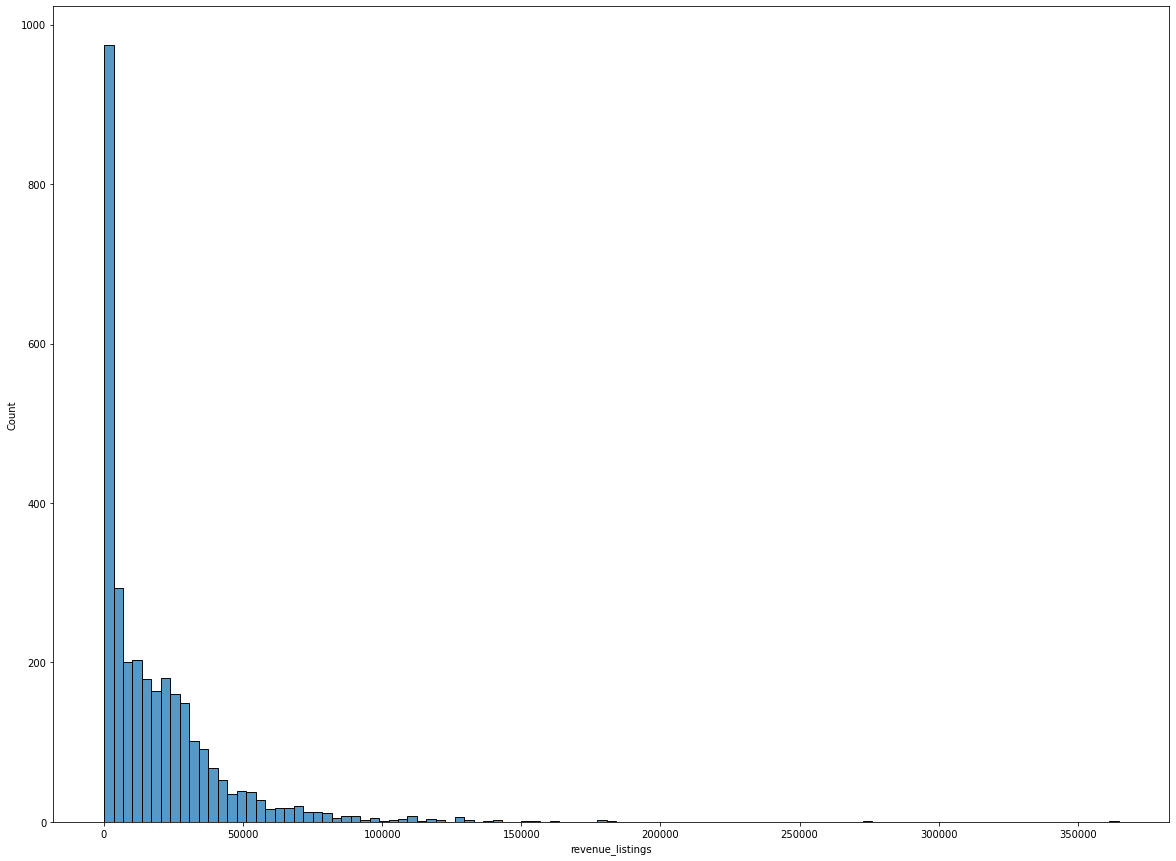

In [252]:
sns.histplot(x='revenue_listings', data=taken_listings_price)


The above plot shows the revenue distribution of all hosts for the yeas 2016 in Seattle. It shows that the majority of the host did make less then 20000$